In [8]:
import tensorflow as tf
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image


In [3]:
# Load the saved model
cnn_loaded = tf.keras.models.load_model("cnn_model.h5")


In [9]:
# Load your unseen data using the data generator 
unseen_data_dir = 'C:\\Users\\hp\\Downloads\\DSSA\\Sem 3\\Deep Learning\\Assignment\\tomato\\val'

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)


unseen_data_generator = train_datagen.flow_from_directory(
    unseen_data_dir,
    target_size=(224, 224),  # Resize images to match training size
    batch_size=32,           # Batch size (adjust as needed)
    class_mode='categorical', # Specify the problem type (e.g., categorical, binary)
    shuffle=False             # Do not shuffle data for predict mode
)


Found 984 images belonging to 10 classes.


In [21]:
import os

# Get a list of class labels (subfolder names)
class_labels = sorted(os.listdir(unseen_data_dir))
print(class_labels)


['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


# PREDICTIONS ON UNSEEN DATA

1/1 [==============================] - 0s 47ms/step


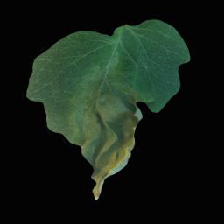

**Actual Label:** Tomato___Late_blight

**Predicted Label:** Tomato___Late_blight

1/1 [==============================] - 0s 50ms/step


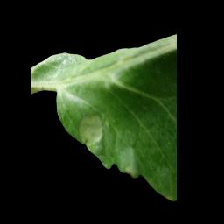

**Actual Label:** Tomato___Late_blight

**Predicted Label:** Tomato___Late_blight

1/1 [==============================] - 0s 56ms/step


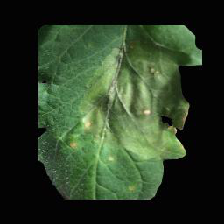

**Actual Label:** Tomato___Late_blight

**Predicted Label:** Tomato___Late_blight

1/1 [==============================] - 0s 45ms/step


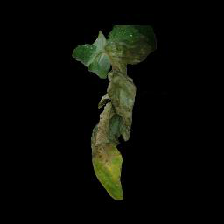

**Actual Label:** Tomato___Late_blight

**Predicted Label:** Tomato___Late_blight

1/1 [==============================] - 0s 47ms/step


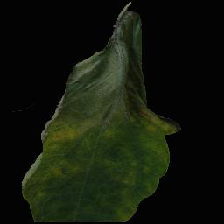

**Actual Label:** Tomato___Late_blight

**Predicted Label:** Tomato___Late_blight

In [29]:
from IPython.display import display, Markdown


# Define class labels based on your dataset
class_labels = sorted(os.listdir(unseen_data_dir))

# Define class indices for mapping labels to integers
class_indices = {class_label: index for index, class_label in enumerate(class_labels)}

# Iterate through each class subfolder
for label in class_labels:
    class_directory = os.path.join(unseen_data_dir, label)

    # Iterate through each image in the class subfolder
    for filename in os.listdir(class_directory):
        if filename.endswith(".jpg"):
            # Load and preprocess the image
            img_path = os.path.join(class_directory, filename)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array /= 255.0  # Normalize pixel values (if needed)

            # Make predictions on the image
            predictions = cnn_loaded.predict(img_array)
            predicted_class_index = np.argmax(predictions, axis=1)
            predicted_class_label = class_labels[predicted_class_index[0]]

            # Display the image
            display(img)

            # Print the actual and predicted labels
            actual_class_label = label  # Use the current subfolder as the actual label
            display(Markdown(f'**Actual Label:** {actual_class_label}'))
            display(Markdown(f'**Predicted Label:** {predicted_class_label}'))
